### exercise 3a
1. Invent an exercise where you have a random variable X with an 
alphabet X with 2 outcomes with integer values.
2. Show some examples of the the probability distribution P(X) for 
different values of the mean value.
3. Discuss the results


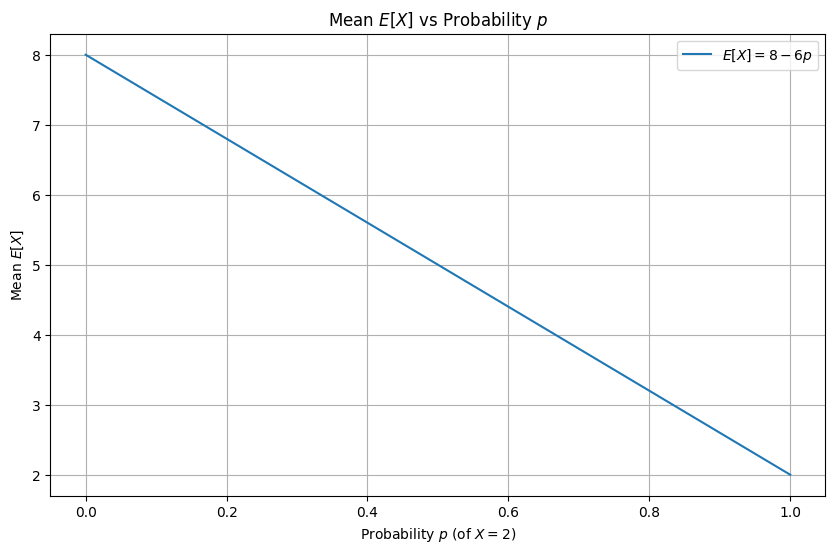

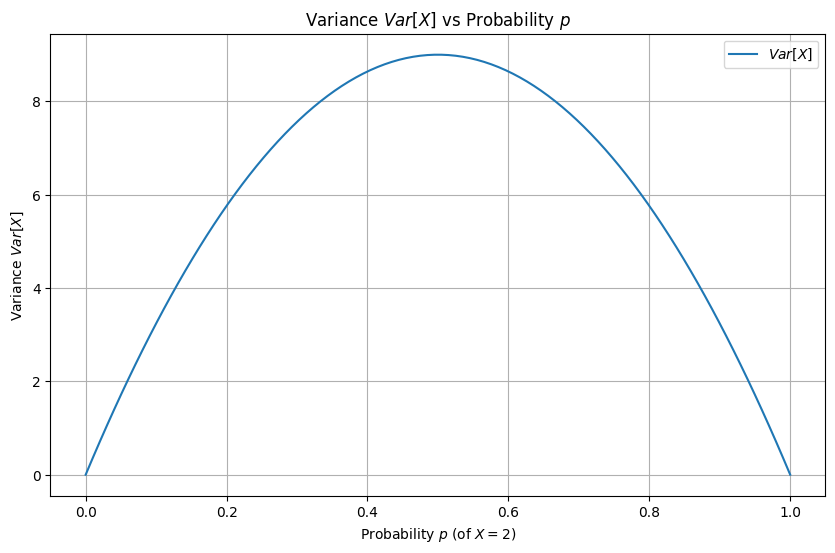

 p	P(X=2)	P(X=8)	E[X]	Var[X]
------------------------------------------
0.00	0.00	1.00	8.00	0.00
0.25	0.25	0.75	6.50	6.75
0.50	0.50	0.50	5.00	9.00
0.75	0.75	0.25	3.50	6.75
1.00	1.00	0.00	2.00	0.00


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the outcomes of the random variable X
x1 = 2
x2 = 8

# Create an array of probability values p from 0 to 1
p_values = np.linspace(0, 1, 100)

# Initialize lists to store mean and variance values
mean_values = []
variance_values = []

# Compute E[X] and Var[X] for each probability p
for p in p_values:
    # Probabilities of X
    P_x1 = p            # P(X = x1)
    P_x2 = 1 - p        # P(X = x2)

    # Mean E[X]
    E_X = x1 * P_x1 + x2 * P_x2

    # E[X^2]
    E_X2 = (x1**2) * P_x1 + (x2**2) * P_x2

    # Variance Var[X] = E[X^2] - (E[X])^2
    Var_X = E_X2 - E_X**2

    # Append the results to the lists
    mean_values.append(E_X)
    variance_values.append(Var_X)

# Plot E[X] vs p
plt.figure(figsize=(10, 6))
plt.plot(p_values, mean_values, label='$E[X] = 8 - 6p$')
plt.title('Mean $E[X]$ vs Probability $p$')
plt.xlabel('Probability $p$ (of $X = 2$)')
plt.ylabel('Mean $E[X]$')
plt.grid(True)
plt.legend()
plt.show()

# Plot Var[X] vs p
plt.figure(figsize=(10, 6))
plt.plot(p_values, variance_values, label='$Var[X]$')
plt.title('Variance $Var[X]$ vs Probability $p$')
plt.xlabel('Probability $p$ (of $X = 2$)')
plt.ylabel('Variance $Var[X]$')
plt.grid(True)
plt.legend()
plt.show()

# Show some example values
print(' p\tP(X=2)\tP(X=8)\tE[X]\tVar[X]')
print('------------------------------------------')
for p in [0, 0.25, 0.5, 0.75, 1]:
    P_x1 = p
    P_x2 = 1 - p
    E_X = x1 * P_x1 + x2 * P_x2
    E_X2 = (x1**2) * P_x1 + (x2**2) * P_x2
    Var_X = E_X2 - E_X**2
    print(f'{p:.2f}\t{P_x1:.2f}\t{P_x2:.2f}\t{E_X:.2f}\t{Var_X:.2f}')


### Overall Conclusions:

1. **Linear Change in Mean \( E[X] \)**:
   - The mean \( E[X] \) decreases linearly from 8 (when \( p = 0 \)) to 2 (when \( p = 1 \)), following the formula \( E[X] = 8 - 6p \).

2. **Parabolic Behavior of Variance \( \text{Var}(X) \)**:
   - The variance \( \text{Var}(X) = 36p(1 - p) \) is parabolic, peaking at \( p = 0.5 \), where the uncertainty is highest. It drops to zero at \( p = 0 \) and \( p = 1 \), where the variable becomes deterministic.

3. **Deterministic and Non-Deterministic States**:
   - At \( p = 0 \) or \( p = 1 \), the variable is deterministic (always 8 or 2, respectively), leading to zero variance. At \( p = 0.5 \), the variable has the highest uncertainty, resulting in the maximum variance.

4. **Visual Summary**:
   - The mean decreases linearly, and the variance forms a parabola, showing the highest variability at \( p = 0.5 \) and no variability at the extremes.

This shows how the probability affects both the expected value and variability of the random variable.

## Exercise 3.b
1. Invent an exercise where you have a random variable X with alphabet 
X with at least 4 outcomes, where each outcome has an inteher
value (“cost”).
2. Fix the mean value bigger than the arithmetic average of the costs, 
and apply the principle of maximum entropy to find the probability 
distribution P(X)
3. Plot P(X)
4. Repeat with a mean value equal to the arithmetic average and plot 
the result
5. Repeat with other values of the mean value and plot the results
6. Comment the results



Mean value (mu): 2.5
Lambda (λ): 0.3370
Probability Distribution P(X):
P(X = 1) = 0.5258
P(X = 3) = 0.2680
P(X = 5) = 0.1366
P(X = 7) = 0.0696


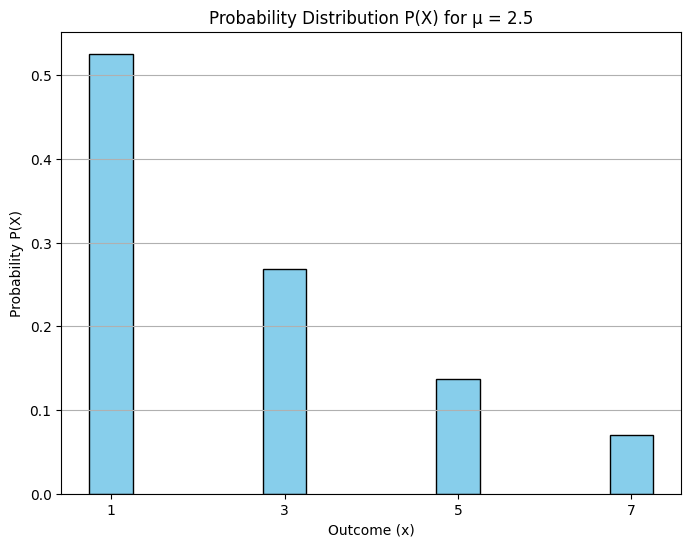


Mean value (mu): 4
Lambda (λ): -0.0000
Probability Distribution P(X):
P(X = 1) = 0.2500
P(X = 3) = 0.2500
P(X = 5) = 0.2500
P(X = 7) = 0.2500


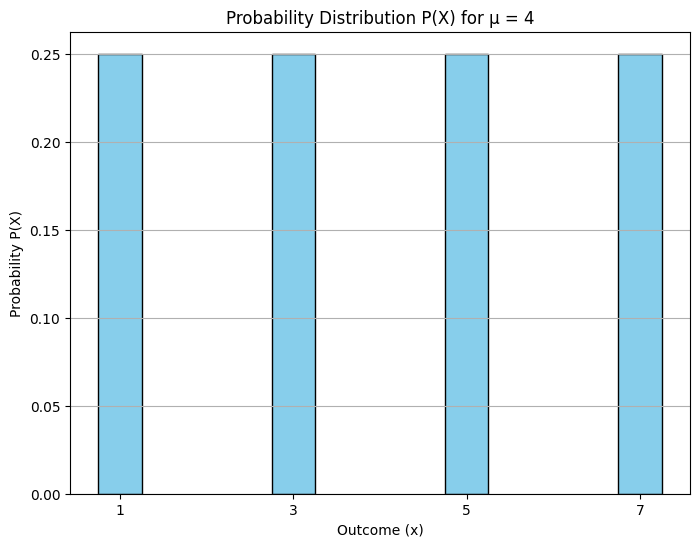


Mean value (mu): 5
Lambda (λ): -0.2098
Probability Distribution P(X):
P(X = 1) = 0.1197
P(X = 3) = 0.1820
P(X = 5) = 0.2770
P(X = 7) = 0.4214


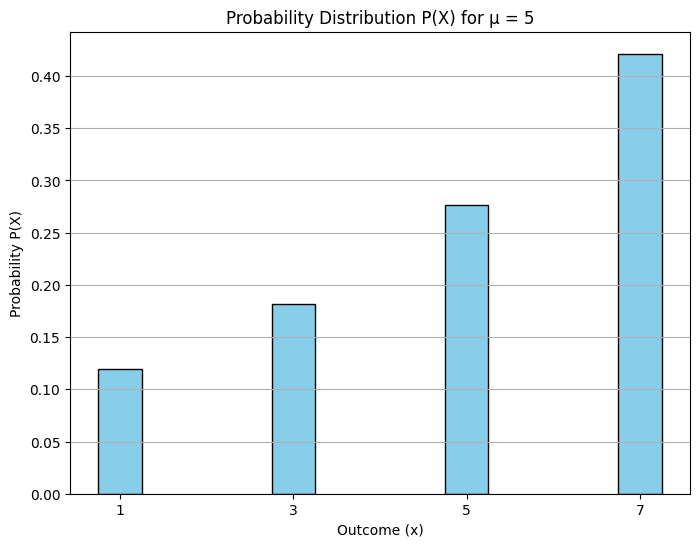


Mean value (mu): 6
Lambda (λ): -0.5060
Probability Distribution P(X):
P(X = 1) = 0.0311
P(X = 3) = 0.0856
P(X = 5) = 0.2355
P(X = 7) = 0.6478


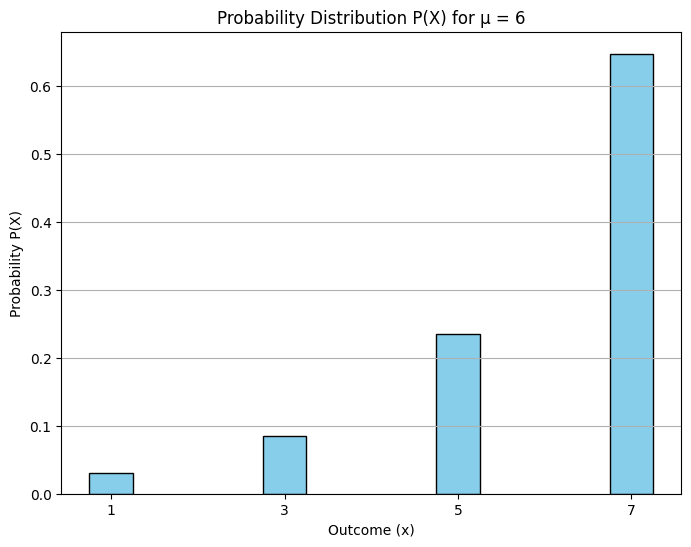

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Eq, exp, nsolve
from sympy import S

# Define the outcomes
x_values = np.array([1, 3, 5, 7])

# Mean values to test
mu_values = [2.5, 4, 5, 6]

# Loop over each mean value
for mu in mu_values:
    # Symbolic variable for lambda
    lmbda = symbols('lambda', real=True)
    
    # Symbolic expressions for numerator and denominator
    exp_terms = [exp(-lmbda * x) for x in x_values]
    Z = sum(exp_terms)
    mean_expr = sum(x * exp(-lmbda * x) for x in x_values) / Z
    
    # Equation to solve: mean_expr == mu
    equation = Eq(mean_expr, mu)
    
    # Numerically solve the equation using nsolve
    try:
        # Provide an initial guess for lambda
        if mu < np.mean(x_values):
            initial_guess = S(0.1)
        elif mu == np.mean(x_values):
            initial_guess = S(0)
        else:
            initial_guess = S(-0.1)
        
        # Use nsolve to find the numerical solution for lambda
        lmbda_value = nsolve(equation, lmbda, initial_guess)
        lmbda_value = float(lmbda_value)
        
        # Compute the probabilities
        exp_terms_numeric = np.exp(-lmbda_value * x_values)
        Z_numeric = np.sum(exp_terms_numeric)
        probabilities = exp_terms_numeric / Z_numeric
        
        # Display the results
        print(f"\nMean value (mu): {mu}")
        print(f"Lambda (λ): {lmbda_value:.4f}")
        print("Probability Distribution P(X):")
        for x_val, prob in zip(x_values, probabilities):
            print(f"P(X = {x_val}) = {prob:.4f}")
        
        # Plot the probability distribution
        plt.figure(figsize=(8, 6))
        plt.bar(x_values, probabilities, width=0.5, color='skyblue', edgecolor='black')
        plt.xlabel('Outcome (x)')
        plt.ylabel('Probability P(X)')
        plt.title(f'Probability Distribution P(X) for μ = {mu}')
        plt.xticks(x_values)
        plt.grid(axis='y')
        plt.show()
    except Exception as e:
        print(f"No valid solution for lambda when mu = {mu}")
        print(f"Error: {e}")
